<a href="https://colab.research.google.com/github/azdfkpot/NNs-and-functions-/blob/main/2D_fun.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

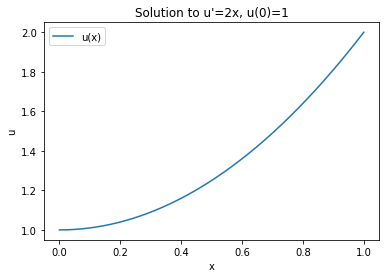

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the function u(x)
def u(x):
    return x**2 + 1

# Create an array of x values
x_vals = np.linspace(0, 1, 1000)

# Calculate the corresponding y values
y_vals = u(x_vals)

# Plot the function
plt.plot(x_vals, y_vals, label='u(x)')

# Add labels and title
plt.xlabel('x')
plt.ylabel('u')
plt.title('Solution to u\'=2x, u(0)=1')

# Add legend
plt.legend()

# Show the plot
plt.show()

1/1 [==============================] - 0s 104ms/step


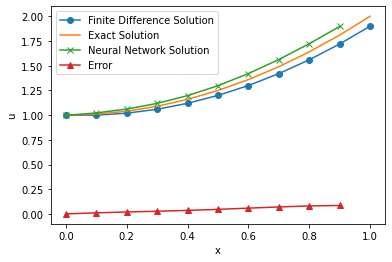

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

# Define the exact solution function
def exact_solution(x):
    return x**2 + 1

# Define the initial condition and parameters for the finite difference method
u0 = 1
h = 0.1
num_points = 11

# Define the grid of points
x = np.linspace(0, 1, num_points)

# Initialize the solution array with the initial condition
u = np.zeros(num_points)
u[0] = u0

# Use the finite difference method to approximate the solution
for i in range(num_points-1):
    u[i+1] = u[i] + h*2*x[i]

# Generate a dataset from the finite difference solution
X_train = x[:-1].reshape(-1, 1)
y_train = u[1:].reshape(-1, 1)

# Define and train a neural network
model = keras.Sequential([
    keras.layers.Dense(32, activation='tanh', input_shape=(1,)),
    keras.layers.Dense(1)
])
model.compile(optimizer='Adamax', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=10000, verbose=0)

# Evaluate the neural network on the same grid of points as the finite difference method
y_pred = model.predict(x.reshape(-1, 1))[:-1]

# Compute the error between the exact solution and the neural network solution
error = np.abs(exact_solution(x[:-1]) - y_pred.reshape(-1))

# Plot the exact, finite difference, and neural network solutions in the same figure
plt.plot(x, u, 'o-', label='Finite Difference Solution')
plt.plot(x, exact_solution(x), label='Exact Solution')
plt.plot(x[:-1], y_pred, 'x-', label='Neural Network Solution')
plt.plot(x[:-1], error, '^-', label='Error')
plt.xlabel('x')
plt.ylabel('u')
plt.legend()
plt.show()

1/1 [==============================] - 0s 83ms/step


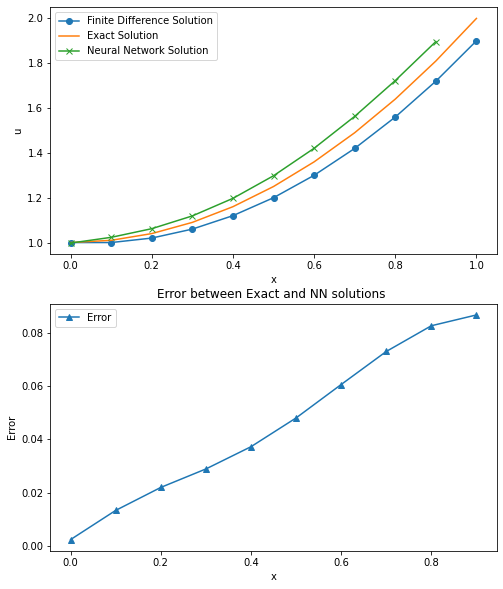

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

# Define the exact solution function
def exact_solution(x):
    return x**2 + 1

# Define the initial condition and parameters for the finite difference method
u0 = 1
h = 0.1
num_points = 11

# Define the grid of points
x = np.linspace(0, 1, num_points)

# Initialize the solution array with the initial condition
u = np.zeros(num_points)
u[0] = u0

# Use the finite difference method to approximate the solution
for i in range(num_points-1):
    u[i+1] = u[i] + h*2*x[i]

# Generate a dataset from the finite difference solution
X_train = x[:-1].reshape(-1, 1)
y_train = u[1:].reshape(-1, 1)

# Define and train a neural network
model = keras.Sequential([
    keras.layers.Dense(32, activation='tanh', input_shape=(1,)),
    keras.layers.Dense(1)
])
model.compile(optimizer='Adamax', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=10000, verbose=0)

# Evaluate the neural network on the same grid of points as the finite difference method
y_pred = model.predict(x.reshape(-1, 1))[:-1]

# Compute the error between the exact solution and the neural network solution
error = np.abs(exact_solution(x[:-1]) - y_pred.reshape(-1))

# Plot the exact, finite difference, and neural network solutions in one figure

fig, axs = plt.subplots(2, 1, figsize=(8, 10))
axs[0].plot(x, u, 'o-', label='Finite Difference Solution')
axs[0].plot(x, exact_solution(x), label='Exact Solution')
axs[0].plot(x[:-1], y_pred, 'x-', label='Neural Network Solution')
axs[0].set_xlabel('x')
axs[0].set_ylabel('u')


# Plot the error in a separate figure
axs[1].plot(x[:-1], error, '^-', label='Error')
axs[1].set_xlabel('x')
axs[1].set_ylabel('Error')
axs[1].legend()
axs[0].legend()
plt.title('Error between Exact and NN solutions ')
plt.show()

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def f(x, u):
    return tf.gradients(u, x)[0] - 2*x

In [ ]:
def ic(x):
    return tf.constant(1.0, dtype=tf.float32)

In [ ]:
def loss(model, x, u, x_ic):
    u_pred = model(x)
    u_ic = model(x_ic)
    u_ic_true = ic(x_ic)
    f_pred = f(x, u_pred)
    return tf.reduce_mean(tf.square(u - u_pred)) + \
           tf.reduce_mean(tf.square(u_ic - u_ic_true)) + \
           tf.reduce_mean(tf.square(f_pred))

In [ ]:
class PINN(tf.keras.Model):
    def __init__(self):
        super(PINN, self).__init__()
        self.dense1 = tf.keras.layers.Dense(100, activation=tf.nn.tanh)
        self.dense2 = tf.keras.layers.Dense(100, activation=tf.nn.tanh)
        self.dense3 = tf.keras.layers.Dense(1)

    def call(self, inputs):
        x = inputs[:, 0:1]
        u = self.dense1(x)
        u = self.dense2(u)
        u = self.dense3(u)
        return u

In [ ]:
x_min, x_max = 0.0, 1.0

In [ ]:
x = np.linspace(x_min, x_max, 100)[:, None]
u_true = x**2 + 1

x_ic = np.array([[0.0], [1.0]])

In [ ]:
model = PINN()
optimizer = tf.keras.optimizers.Adam()

In [ ]:

num_iterations = 10000
learning_rate = 0.001

optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

for i in range(num_iterations):
    with tf.GradientTape() as tape:
        u_pred = model(x)
        loss_value = loss(model, x, u_true, x_ic)
    grads = tape.gradient(loss_value, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

    if i % 1000 == 0:
        print("Loss at step {}: {}".format(i, loss_value.numpy()))

    # Plot the solution
    if i == 0 or (i + 1) % 1000 == 0:
        u_pred = model(x)
        plt.plot(x, u_true, 'b-', label='True Solution')
        plt.plot(x, u_pred, 'r--', label='PINN Solution')
        plt.xlabel('x')
        plt.ylabel('u(x)')
        plt.legend()
        plt.show()

    # Adjust learning rate
    if (i + 1) % 2000 == 0:
        optimizer.lr.assign(0.1 * optimizer.lr)

ValueError: ignored

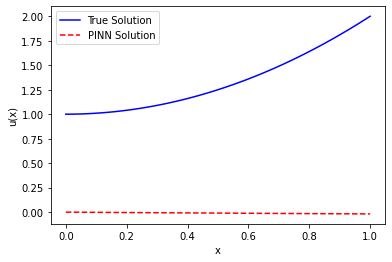

In [ ]:
u_pred = model(x)
plt.plot(x, u_true, 'b-', label='True Solution')
plt.plot(x, u_pred, 'r--', label='PINN Solution')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()
plt.show()

epoch:   0 loss: 110.511131
epoch: 100 loss: 0.367334
epoch: 200 loss: 0.275039
epoch: 300 loss: 0.205329
epoch: 400 loss: 0.140802
epoch: 500 loss: 0.086976
epoch: 600 loss: 0.058065
epoch: 700 loss: 0.051476
epoch: 800 loss: 0.051350
epoch: 900 loss: 0.050438
epoch: 1000 loss: 0.049259
epoch: 1100 loss: 0.048444
epoch: 1200 loss: 0.047795
epoch: 1300 loss: 0.047164
epoch: 1400 loss: 0.046546
epoch: 1500 loss: 0.045950
epoch: 1600 loss: 0.045375
epoch: 1700 loss: 0.044818
epoch: 1800 loss: 0.044276
epoch: 1900 loss: 0.043750
epoch: 2000 loss: 0.043238
epoch: 2100 loss: 0.042739
epoch: 2200 loss: 0.042252
epoch: 2300 loss: 0.041778
epoch: 2400 loss: 0.041314
epoch: 2500 loss: 0.040862
epoch: 2600 loss: 0.040419
epoch: 2700 loss: 0.039985
epoch: 2800 loss: 0.039561
epoch: 2900 loss: 0.039146
epoch: 3000 loss: 0.038738
epoch: 3100 loss: 0.038339
epoch: 3200 loss: 0.037947
epoch: 3300 loss: 0.037562
epoch: 3400 loss: 0.037184
epoch: 3500 loss: 0.036812
epoch: 3600 loss: 0.036447
epoch: 37

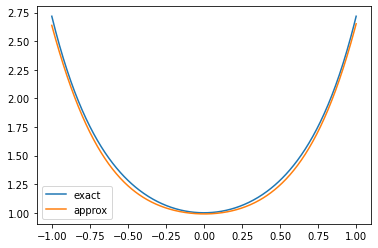

In [ ]:
# This is a numerical solver of the ordinary differnetial equation y'(x) - 2xy(x) = 0 with initial condition y(0) = 1
# y(x) is approximated with a neural network which is trained to satisfy the differential equation and the condition. 
# The analytical solution for this ODE is y = exp(x^2), which is used in plotting to compare with the numerical solution. 

import sys
import jax.numpy as np
from jax import random
from jax import grad
from jax import vmap
from jax import jit
import matplotlib.pyplot as plt

###############
## Functions ##
###############

def softplus(x):
    return np.log(1 + np.exp(x))

def sigmoid(x):
    return 1./(1. + np.exp(-x))

def f(params, x):
    w0 = params[:80]
    b0 = params[80:160]
    w1 = params[160:240]
    b1 = params[240]
    h = softplus(x*w0 + b0)
    o = np.sum(h*w1) + b1
    return o

@jit
def loss(params, inputs):
    eq = dfdx_vect(params, inputs) - 2 * inputs * f_vect(params, inputs)
    bc1 = f(params, 0) - 1
    return np.mean(eq**2) + bc1**2

##########
## Main ##
##########

# Initialize Neural Network parameters

key = random.PRNGKey(0)
params = random.normal(key, shape=(241,))

# Setting up derivatives and gradients

dfdx = grad(f, 1)
f_vect = vmap(f, (None, 0))
dfdx_vect = vmap(dfdx, (None, 0))
grad_loss = jit(grad(loss, 0))

# Defining domain (x)

inputs = np.linspace(-1, 1, num=401)

# Setting training parameters

epochs = 20000
learning_rate = 0.0005
momentum = 0.99
velocity = 0.

# Training Neural Network

for epoch in range(epochs):
    if epoch % 100  == 0:
        print('epoch: %3d loss: %.6f' % (epoch, loss(params, inputs)))
    gradient = grad_loss(params + momentum*velocity, inputs)
    velocity = momentum*velocity - learning_rate*gradient
    params += velocity

# plotting

plt.plot(inputs, np.exp(inputs**2), label='exact')
plt.plot(inputs, f_vect(params, inputs), label='approx')
plt.legend()
plt.show()

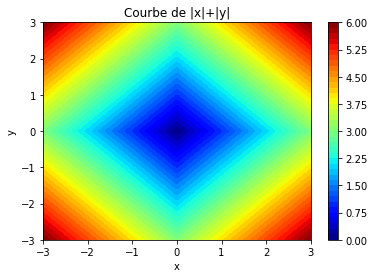

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
Z = np.abs(X) + np.abs(Y)

plt.contourf(X, Y, Z, levels=50, cmap='jet')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Courbe de |x|+|y|')
plt.show()

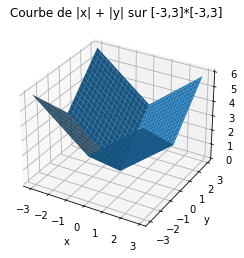

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Définir les variables x et y
x = np.arange(-3, 3, 0.1)
y = np.arange(-3, 3, 0.1)

# Créer la grille de points pour x et y
X, Y = np.meshgrid(x, y)

# Calculer les valeurs de |x|+|y|
Z = np.abs(X) + np.abs(Y)

# Créer la figure 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Tracer la courbe
ax.plot_surface(X, Y, Z)

# Ajouter des étiquettes d'axe et un titre
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('|x| + |y|')
ax.set_title('Courbe de |x| + |y| sur [-3,3]*[-3,3]')

# Afficher le graphique
plt.show()

313/313 [==============================] - 1s 2ms/step


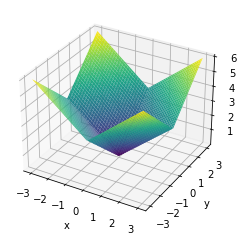

In [ ]:
import tensorflow as tf
import numpy as np

# Define the training data
x_train = np.random.uniform(low=-3, high=3, size=(10000, 2))
y_train = np.abs(x_train[:, 0]) + np.abs(x_train[:, 1])

# Define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(x_train, y_train, epochs=100, batch_size=32, verbose=0)

# Test the model on a grid of points in the interval [-3,3] x [-3,3]
x_test, y_test = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))
z_test = model.predict(np.column_stack((x_test.ravel(), y_test.ravel())))
z_test = z_test.reshape(x_test.shape)

# Plot the results
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x_test, y_test, z_test, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('|x|+|y|')
plt.show()

313/313 [==============================] - 0s 1ms/step


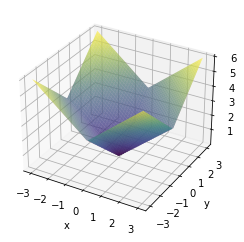

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the function to be approximated
def f(x, y):
    return np.abs(x) + np.abs(y)

# Define the training data
x_train = np.random.uniform(low=-3, high=3, size=(10000, 2))
y_train = f(x_train[:, 0], x_train[:, 1])

# Define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(x_train, y_train, epochs=100, batch_size=32, verbose=0)

# Test the model on a grid of points in the interval [-3,3] x [-3,3]
x_test, y_test = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))
z_test = model.predict(np.column_stack((x_test.ravel(), y_test.ravel())))
z_test = z_test.reshape(x_test.shape)

# Evaluate the exact solution on the same grid of points
z_exact = f(x_test, y_test)

# Plot the results
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x_test, y_test, z_exact, cmap='viridis', alpha=0.5)
ax.plot_surface(x_test, y_test, z_test, cmap='magma', alpha=0.5)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('|x|+|y|')
plt.show()

313/313 [==============================] - 1s 2ms/step


AttributeError: ignored

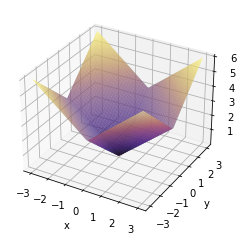

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Define the function to be approximated
def f(x, y):
    return np.abs(x) + np.abs(y)

# Define the training data
x_train = np.random.uniform(low=-3, high=3, size=(10000, 2))
y_train = f(x_train[:, 0], x_train[:, 1])

# Define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(x_train, y_train, epochs=100, batch_size=32, verbose=0)

# Test the model on a grid of points in the interval [-3,3] x [-3,3]
x_test, y_test = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))
z_test = model.predict(np.column_stack((x_test.ravel(), y_test.ravel())))
z_test = z_test.reshape(x_test.shape)

# Evaluate the exact solution on the same grid of points
z_exact = f(x_test, y_test)

# Plot the results
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x_test, y_test, z_exact, cmap='viridis', alpha=0.5, label='Exact')
ax.plot_surface(x_test, y_test, z_test, cmap='magma', alpha=0.5, label='Neural Network')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('|x|+|y|')
ax.legend()
plt.show()

loss: 2480.428467 
loss: 0.549711 
loss: 0.217253 
loss: 0.107614 
loss: 0.062616 
loss: 0.042242 
loss: 0.031289 
loss: 0.024031 
loss: 0.018259 
loss: 0.014000 


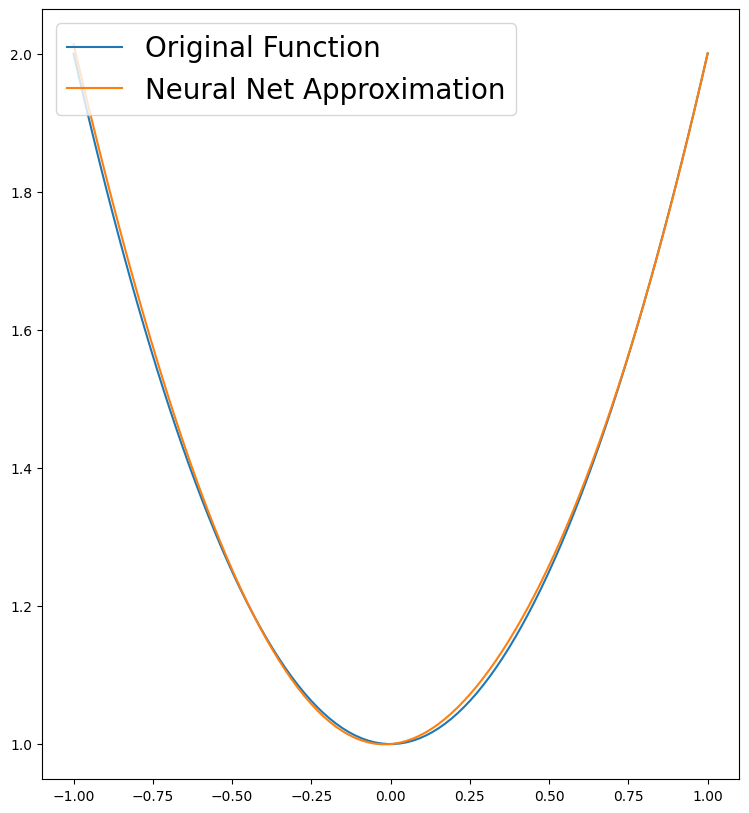

In [ ]:



### Define Variables

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(123)
tf.random.set_seed(123)

# initial condition
u0 = 1
# infinitesimal small number
inf_s = np.sqrt(np.finfo(np.float32).eps)

# Parameters
learning_rate = 0.01
training_steps = 100
batch_size = 100
display_step = training_steps/10

# Network Parameters
n_input = 1     # input layer number of neurons
n_hidden_1 = 32 # 1st layer number of neurons
n_hidden_2 = 32 # 2nd layer number of neurons
n_output = 1    # output layer number of neurons

weights = {
    'h1': tf.Variable(tf.random.normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random.normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random.normal([n_hidden_2, n_output]))
}
biases = {
    'b1': tf.Variable(tf.random.normal([n_hidden_1])),
    'b2': tf.Variable(tf.random.normal([n_hidden_2])),
    'out': tf.Variable(tf.random.normal([n_output]))
}

# Stochastic gradient descent optimizer.
optimizer = tf.optimizers.SGD(learning_rate)


# Create model
def G(x):
    x = np.array([[[x]]],  dtype='float32')
    # Hidden fully connected layer with 32 neurons
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.sigmoid(layer_1)
    # Hidden fully connected layer with 32 neurons
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.sigmoid(layer_2)
    # Output fully connected layer
    output = tf.matmul(layer_2, weights['out']) + biases['out']
    return output

# Universal Approximator
def R(x):
    return x * G(x) + u0

# Given EDO
def f(x):
    return 2*x
    
# Custom loss function to approximate the derivatives
def fun_loss():
    summation = []
    for x in np.linspace(-1,1,10):
        dR = (R(x+inf_s)-R(x))/inf_s
        summation.append((dR - f(x))**2)
    return tf.reduce_sum(tf.abs(summation))

def train_step():
    with tf.GradientTape() as tape:
        loss = fun_loss()
    trainable_variables = list(weights.values()) + list(biases.values())
    gradients = tape.gradient(loss, trainable_variables)
    optimizer.apply_gradients(zip(gradients, trainable_variables))

for i in range(training_steps):
    train_step()
    if i % display_step == 0:
        print("loss: %f " % (fun_loss()))

from matplotlib.pyplot import figure

figure(figsize=(9,10))
# True Solution (found analitically)
def true_solution(x):
    return x**2 + 1

X = np.linspace(-1, 1, 100)
result = []
for i in X:
  # result.append(f(i))
  result.append(R(i).numpy()[0][0][0])

S = true_solution(X)
  
plt.plot(X, S, label="Original Function")
plt.plot(X, result, label="Neural Net Approximation")
plt.legend(loc=2, prop={'size': 20})
plt.show()

ValueError: ignored

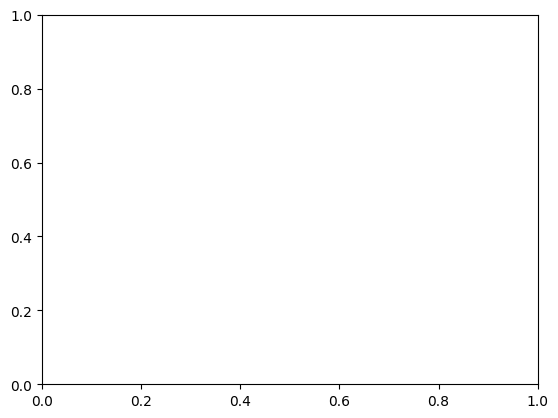

In [ ]:
plt.plot(range(training_steps), fun_loss())

Epoch 1/50
32/32 [==============================] - 2s 3ms/step - loss: 1.9084
Epoch 2/50
32/32 [==============================] - 0s 7ms/step - loss: 1.2809
Epoch 3/50
32/32 [==============================] - 0s 7ms/step - loss: 1.0753
Epoch 4/50
32/32 [==============================] - 0s 10ms/step - loss: 0.9999
Epoch 5/50
32/32 [==============================] - 0s 6ms/step - loss: 0.9602
Epoch 6/50
32/32 [==============================] - 0s 8ms/step - loss: 0.9352
Epoch 7/50
32/32 [==============================] - 0s 11ms/step - loss: 0.9163
Epoch 8/50
32/32 [==============================] - 1s 16ms/step - loss: 0.8995
Epoch 9/50
32/32 [==============================] - 0s 11ms/step - loss: 0.8881
Epoch 10/50
32/32 [==============================] - 0s 12ms/step - loss: 0.8768
Epoch 11/50
32/32 [==============================] - 0s 15ms/step - loss: 0.8676
Epoch 12/50
32/32 [==============================] - 0s 12ms/step - loss: 0.8607
Epoch 13/50
32/32 [=======================

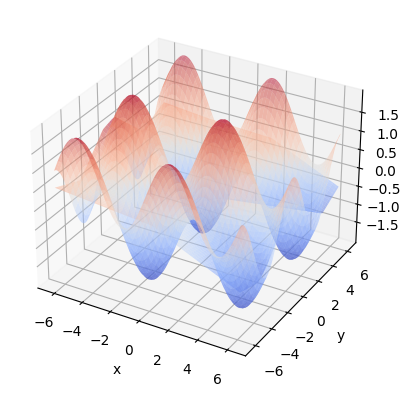

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense

# Define the function to be approximated
def g(x,y):
    return np.sin(x) + np.cos(y)

# Generate input and output data
n_samples = 1000
x_train = np.random.uniform(-2*np.pi, 2*np.pi, (n_samples, 2))
y_train = g(x_train[:,0], x_train[:,1])

# Define the neural network model
model = Sequential()
model.add(Dense(10, input_dim=2, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(loss='mse', optimizer='adam')

# Train the model
model.fit(x_train, y_train, epochs=50, batch_size=32)

# Generate test data
x_test = np.linspace(-2*np.pi, 2*np.pi, 100)
y_test = np.linspace(-2*np.pi, 2*np.pi, 100)
x_test, y_test = np.meshgrid(x_test, y_test)
z_exact = g(x_test, y_test)
z_nn = model.predict(np.column_stack((x_test.flatten(), y_test.flatten())))
z_nn = np.reshape(z_nn, (100, 100))

# Plot the exact and neural network solutions
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x_test, y_test, z_exact, cmap='coolwarm', alpha=0.5)
ax.plot_surface(x_test, y_test, z_nn, cmap='coolwarm', alpha=0.5)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.9883
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.9202
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8965
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.8767
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.8612
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.8468
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.8302
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.8114
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.8065
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7915
Epoch 11/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7762
Epoch 12/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7607
Epoch 13/100
32/32 [=================

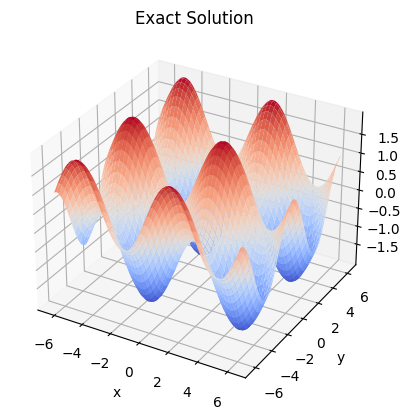

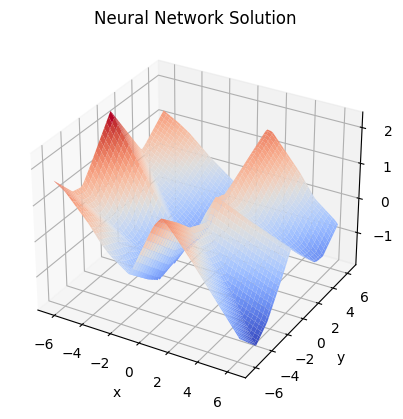

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from keras.models import Sequential
from keras.layers import Dense

# Define the function to be approximated
def g(x,y):
    return np.sin(x) + np.cos(y)

# Generate input and output data
n_samples = 1000
x_train = np.random.uniform(-2*np.pi, 2*np.pi, (n_samples, 2))
y_train = g(x_train[:,0], x_train[:,1])

# Define the neural network model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(loss='mse', optimizer='adam')

# Train the model
model.fit(x_train, y_train, epochs=100, batch_size=32)

# Generate test data
x_test = np.linspace(-2*np.pi, 2*np.pi, 100)
y_test = np.linspace(-2*np.pi, 2*np.pi, 100)
x_test, y_test = np.meshgrid(x_test, y_test)
z_exact = g(x_test, y_test)
z_nn = model.predict(np.column_stack((x_test.flatten(), y_test.flatten())))
z_nn = np.reshape(z_nn, (100, 100))

# Plot the exact solution
fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection='3d')
ax1.plot_surface(x_test, y_test, z_exact, cmap='coolwarm')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.set_title('Exact Solution')

# Plot the neural network solution
fig2 = plt.figure()
ax2 = fig2.add_subplot(111, projection='3d')
ax2.plot_surface(x_test, y_test, z_nn, cmap='coolwarm')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('z')
ax2.set_title('Neural Network Solution')

plt.show()

Epoch 1/500
32/32 [==============================] - 1s 3ms/step - loss: 1.3114
Epoch 2/500
32/32 [==============================] - 0s 3ms/step - loss: 1.0047
Epoch 3/500
32/32 [==============================] - 0s 3ms/step - loss: 0.9469
Epoch 4/500
32/32 [==============================] - 0s 3ms/step - loss: 0.9201
Epoch 5/500
32/32 [==============================] - 0s 3ms/step - loss: 0.8984
Epoch 6/500
32/32 [==============================] - 0s 3ms/step - loss: 0.8780
Epoch 7/500
32/32 [==============================] - 0s 4ms/step - loss: 0.8621
Epoch 8/500
32/32 [==============================] - 0s 3ms/step - loss: 0.8457
Epoch 9/500
32/32 [==============================] - 0s 3ms/step - loss: 0.8377
Epoch 10/500
32/32 [==============================] - 0s 3ms/step - loss: 0.8201
Epoch 11/500
32/32 [==============================] - 0s 3ms/step - loss: 0.8057
Epoch 12/500
32/32 [==============================] - 0s 3ms/step - loss: 0.7927
Epoch 13/500
32/32 [=================

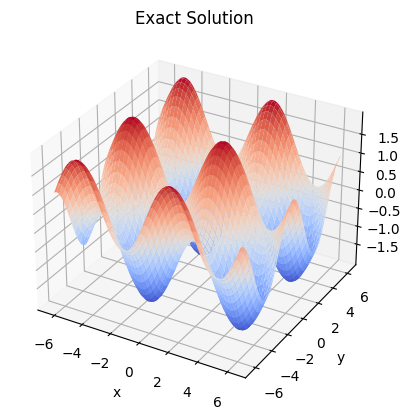

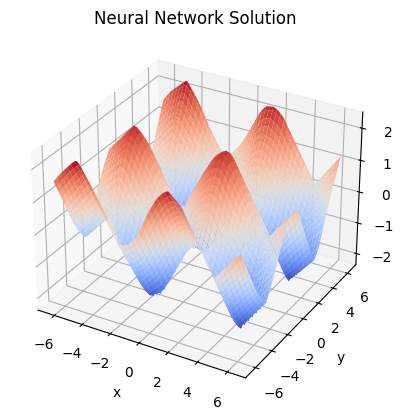

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from keras.models import Sequential
from keras.layers import Dense

# Define the function to be approximated
def g(x,y):
    return np.sin(x) + np.cos(y)

# Generate input and output data
n_samples = 1000
x_train = np.random.uniform(-2*np.pi, 2*np.pi, (n_samples, 2))
y_train = g(x_train[:,0], x_train[:,1])

# Define the neural network model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(loss='mse', optimizer='adam')

# Train the model
model.fit(x_train, y_train, epochs=500, batch_size=32)

# Generate test data
x_test = np.linspace(-2*np.pi, 2*np.pi, 100)
y_test = np.linspace(-2*np.pi, 2*np.pi, 100)
x_test, y_test = np.meshgrid(x_test, y_test)
z_exact = g(x_test, y_test)
z_nn = model.predict(np.column_stack((x_test.flatten(), y_test.flatten())))
z_nn = np.reshape(z_nn, (100, 100))

# Plot the exact solution
fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection='3d')
ax1.plot_surface(x_test, y_test, z_exact, cmap='coolwarm')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.set_title('Exact Solution')

# Plot the neural network solution
fig2 = plt.figure()
ax2 = fig2.add_subplot(111, projection='3d')
ax2.plot_surface(x_test, y_test, z_nn, cmap='coolwarm')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('z')
ax2.set_title('Neural Network Solution')

plt.show()

Epoch 1/1000
32/32 [==============================] - 1s 3ms/step - loss: 0.8788
Epoch 2/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.8129
Epoch 3/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.7718
Epoch 4/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.7488
Epoch 5/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.6858
Epoch 6/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.6559
Epoch 7/1000
32/32 [==============================] - 0s 4ms/step - loss: 0.6206
Epoch 8/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.6214
Epoch 9/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.5772
Epoch 10/1000
32/32 [==============================] - 0s 4ms/step - loss: 0.5590
Epoch 11/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.5415
Epoch 12/1000
32/32 [==============================] - 0s 5ms/step - loss: 0.5398
Epoch 13/1000
32/32 [====

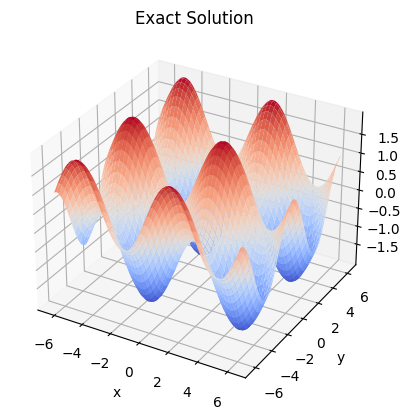

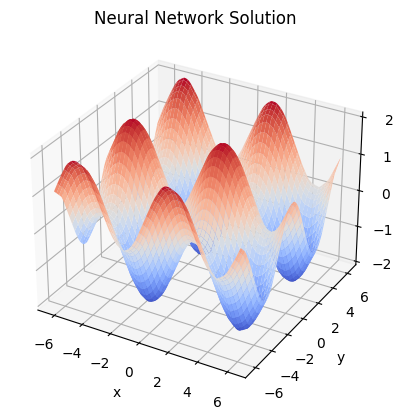

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from keras.models import Sequential
from keras.layers import Dense

# Define the function to be approximated
def g(x,y):
    return np.sin(x) + np.cos(y)

# Generate input and output data
n_samples = 1000
x_train = np.random.uniform(-2*np.pi, 2*np.pi, (n_samples, 2))
y_train = g(x_train[:,0], x_train[:,1])

# Define the neural network model
model = Sequential()
model.add(Dense(1000, input_dim=2, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(loss='mse', optimizer='adam')

# Train the model
model.fit(x_train, y_train, epochs=1000, batch_size=32)

# Generate test data
x_test = np.linspace(-2*np.pi, 2*np.pi, 100)
y_test = np.linspace(-2*np.pi, 2*np.pi, 100)
x_test, y_test = np.meshgrid(x_test, y_test)
z_exact = g(x_test, y_test)
z_nn = model.predict(np.column_stack((x_test.flatten(), y_test.flatten())))
z_nn = np.reshape(z_nn, (100, 100))

# Plot the exact solution
fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection='3d')
ax1.plot_surface(x_test, y_test, z_exact, cmap='coolwarm')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.set_title('Exact Solution')

# Plot the neural network solution
fig2 = plt.figure()
ax2 = fig2.add_subplot(111, projection='3d')
ax2.plot_surface(x_test, y_test, z_nn, cmap='coolwarm')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('z')
ax2.set_title('Neural Network Solution')

plt.show()